# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

#주성분 분석(PCA; Principal Component Analysis): 대표적인 차원 축소 알고리즘 (차원을 줄이면 저장 공간을 절약할 수 있음. 일반적으로 원본데이터에 있는 특성 개수보다 작음)
#데이터에 있는 분산(=데이터가 널리 퍼져있는 정도)이 큰 방향을 찾는 것
#주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어듦. 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #n_component 매개변수에 주성분의 개수를 지정. PC1~PC10000 중 50개만 사용. PCA클래스가 찾은 주성분은 components_ 속성에 저장되어 있음
pca.fit(fruits_2d) #k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메소드에 타깃값을 제공하지 않음

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

#n_components=50으로 지정했기 때문에 pca.components_배열의 첫번째 차원이 50 => 50개의 주성분
#두번째 차원은 항상 원본데이터의 특성 개수와 같은 10000

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

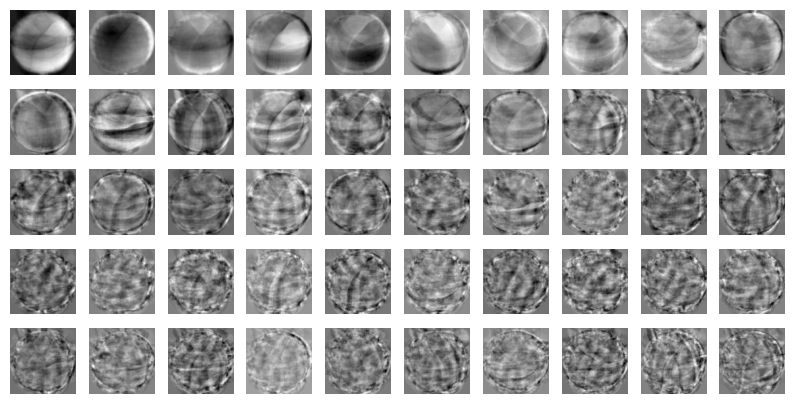

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) #10000개로 주성분을 만들고 -> draw_fruits() 함수를 사용해서 주성분 50개로 그림을 그림

In [7]:
print(fruits_2d.shape) #10000개의 픽셀(특성)을 가진 300개의 이미지

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d) #원본데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있음 => transform() 메소드를 사용해 원본데이터의 차원을 50으로 줄임

In [9]:
print(fruits_pca.shape) #50개의 주성분을 찾은 PCA모델을 사용해 (300,50)크기의 배열로 변환

(300, 50)


## 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

#inverse_transform(): 변환된 데이터에서 원본데이터를 복원. 앞서 50개의 차원으로 축소한 fruits_pca데이터를 전달해 10,000개의 특성을 복원
#변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되지 않음

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

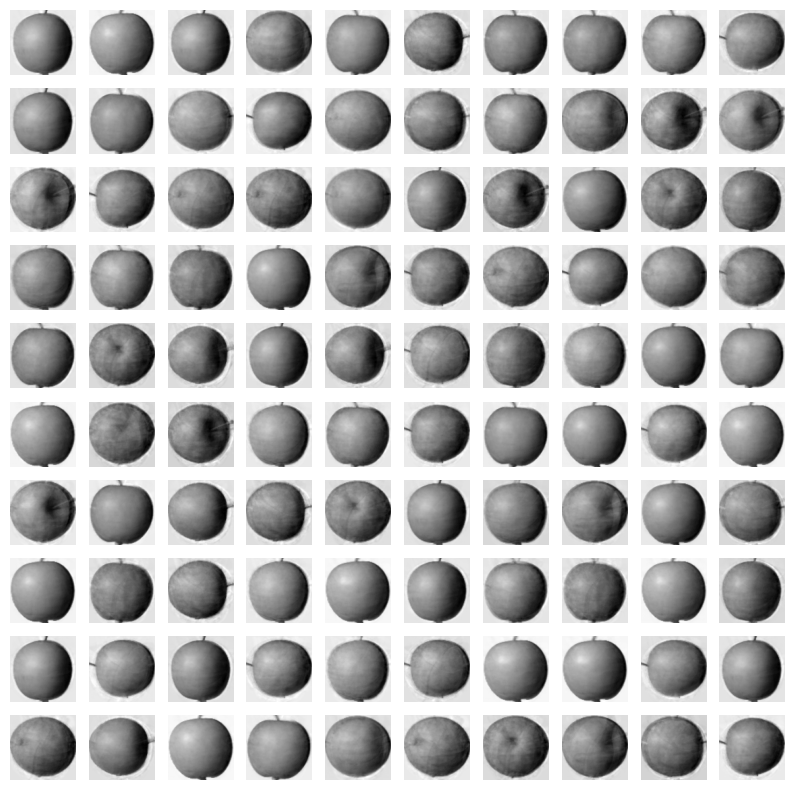

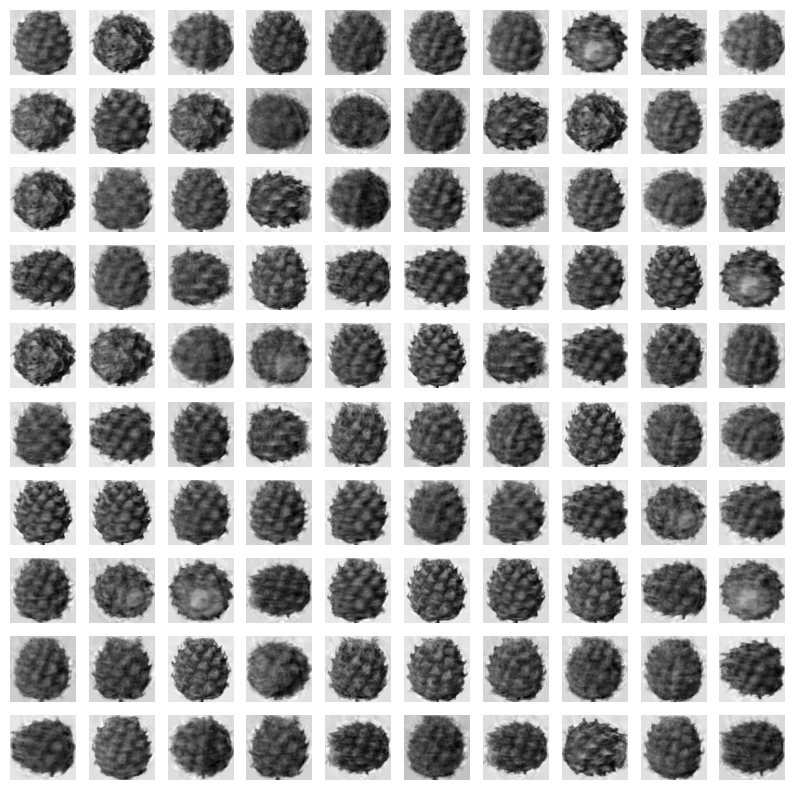

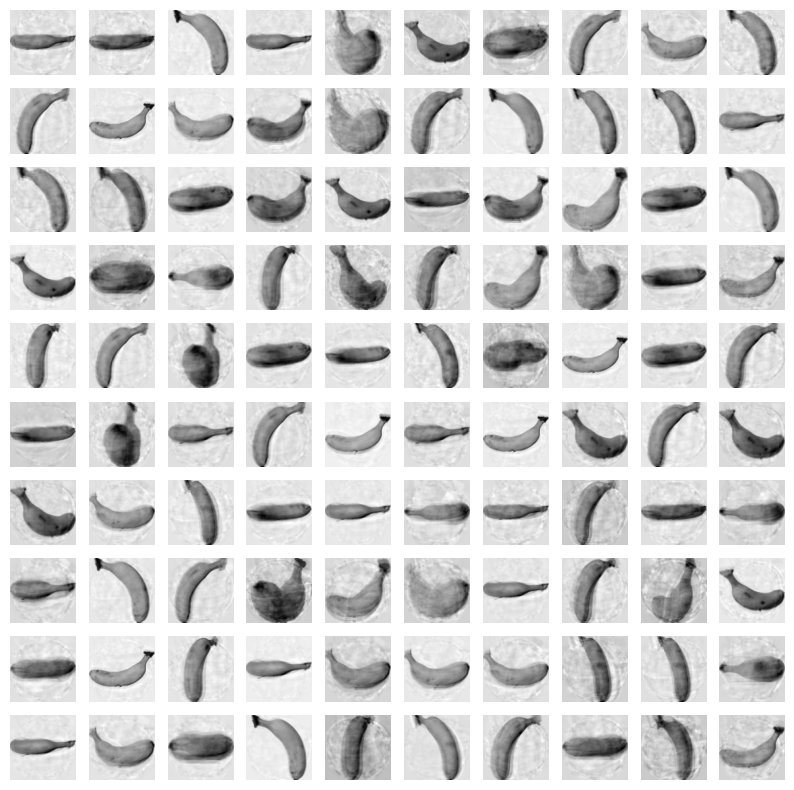

In [12]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n") #100 x 100 크기로 바꾸어 100개씩 나누어 출력

## 설명된 분산

In [13]:
print(np.sum(pca.explained_variance_ratio_))

#설명된 분산(explained variance): 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값
#사이킷런의 PCA(=주성분 분석을 수행하는 클래스)는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있음

0.9215607598817032


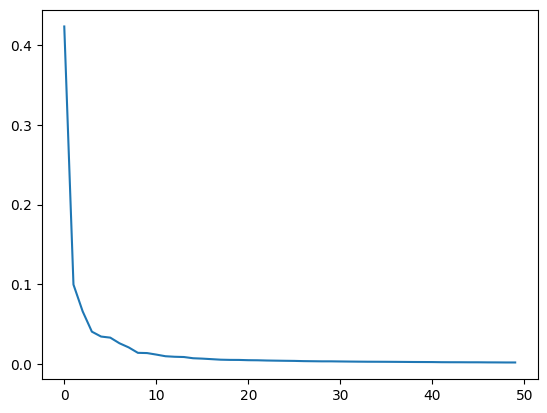

In [14]:
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기

In [15]:
from sklearn.linear_model import LogisticRegression #3개의 과일사진을 분류해야 하므로 로지스틱 회귀 모델 사용

lr = LogisticRegression()

In [16]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

#지도 학습 모델을 사용하려면 타깃값이 있어야 하므로 사과 0, 파인애플 1, 바나나 2로 지정. 파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복 => 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 손쉽게 만들 수 있음

In [17]:
from sklearn.model_selection import cross_validate #로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증 수행

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.18933324813842772


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.009892940521240234


In [19]:
pca = PCA(n_components=0.5) #주성분 개수 대신 0~1 사이의 비율을 실수로 입력해 몇 개의 주성분을 찾았는지 확인
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
print(pca.n_components_) #2개의 특성만으로 원본 데이터에 있는 분산의 50% 표현 가능

2


In [21]:
fruits_pca = pca.transform(fruits_2d) #원본 데이터 반환. 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)
print(fruits_pca.shape)

(300, 2)


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.022792863845825195


c:\Users\tjoeun\miniconda3\envs\firstenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tjoeun\miniconda3\envs\firstenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [23]:
from sklearn.cluster import KMeans #라벨이 없는 비지도 학습 데이터이므로 KMeans로 라벨링

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

c:\Users\tjoeun\miniconda3\envs\firstenv\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


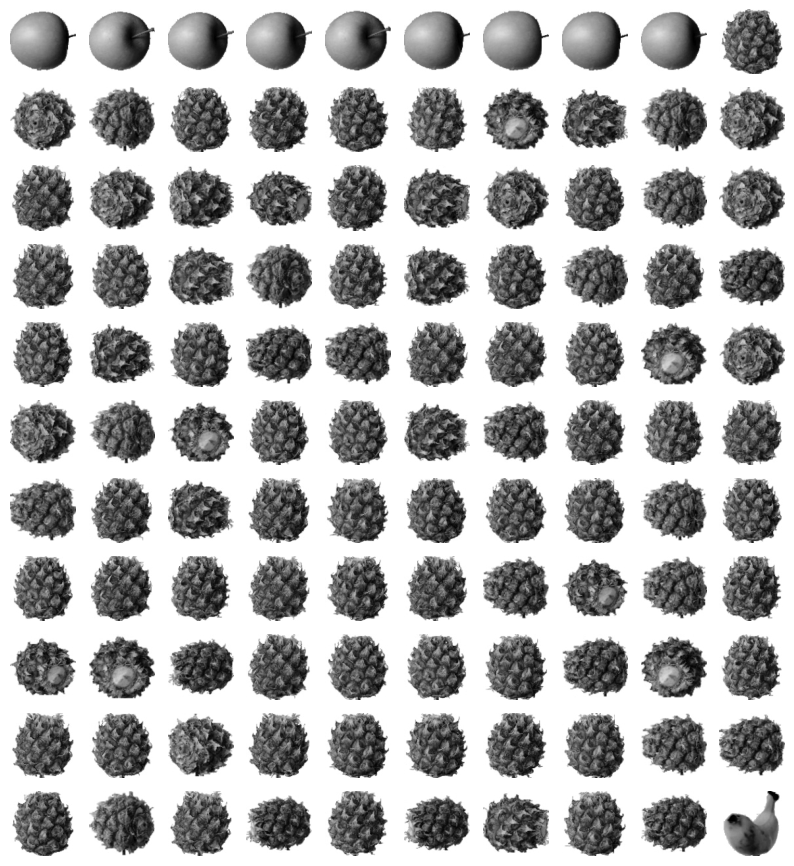

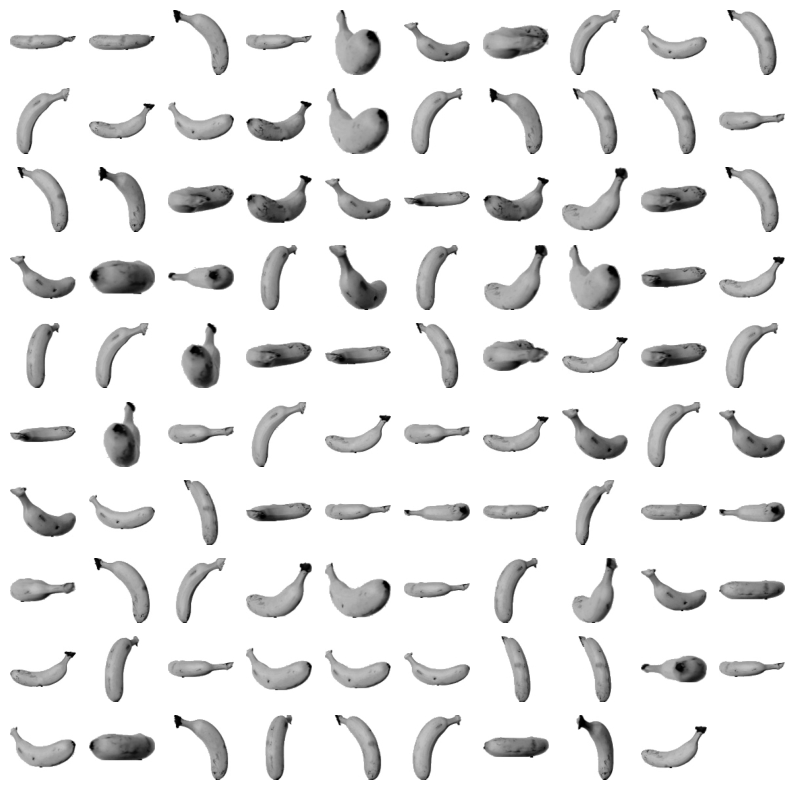

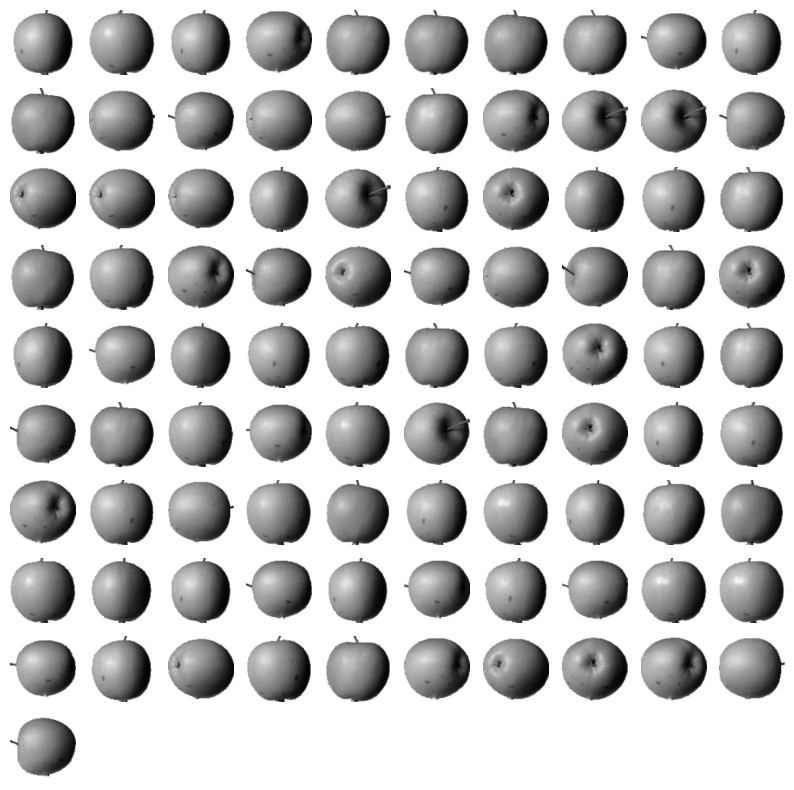

In [25]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")  

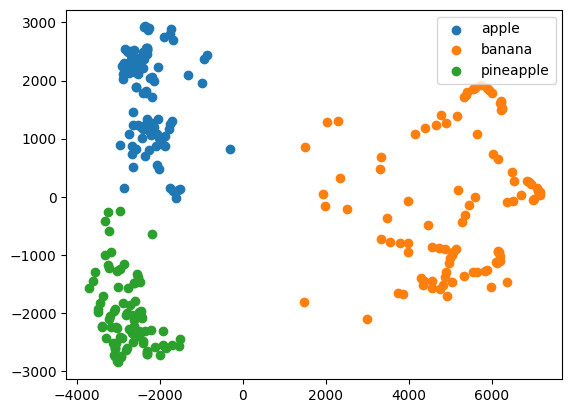

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

#훈련 데이터 차원 축소 시 데이터셋의 크기를 줄일 수 있고, 비교적 시각화하기 쉬움 (데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있음)
#차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련 속도를 빠르게 만들 수 있음